In [2]:
# Adam m France
# afrance3@uncc.edu 

import pandas as pd             # for creating dataframes
import matplotlib.pyplot as plt # for visualizations
import numpy as np              # i dont remember?
import urllib.request           # needed to get data directly from github 

# read in csv data and reformat as dataframes 
path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
path_confirmed_us = urllib.request.urlopen(path + "time_series_covid19_confirmed_US.csv"    )
path_deaths_us    = urllib.request.urlopen(path + "time_series_covid19_deaths_US.csv"       )
path_recovered    = urllib.request.urlopen(path + "time_series_covid19_recovered_global.csv")

path_confirmed = urllib.request.urlopen(path + "time_series_covid19_confirmed_global.csv")
path_deaths    = urllib.request.urlopen(path + "time_series_covid19_deaths_global.csv"   )

confirmed_us = pd.read_csv(path_confirmed_us)
deaths_us    = pd.read_csv(path_deaths_us)
recovered    = pd.read_csv(path_recovered)

confirmed = pd.read_csv(path_confirmed)
deaths    = pd.read_csv(path_deaths)


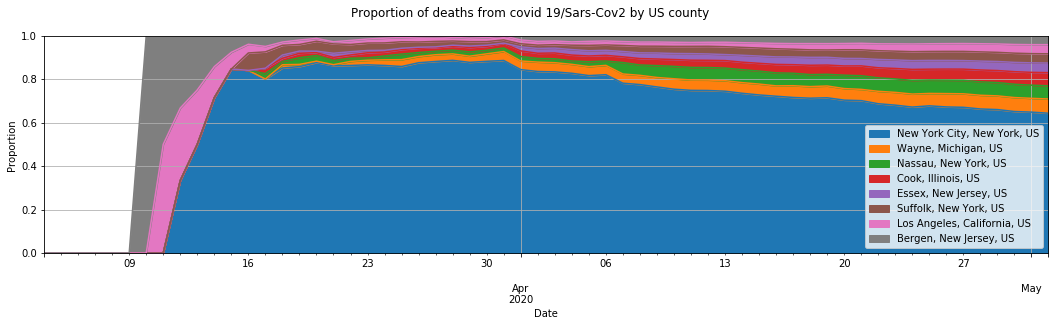

In [15]:
# 1.a : area map of deaths by US county within last 60 days

start = deaths_us.keys()[-8]
end   = deaths_us.keys()[-1]
top8  = pd.DataFrame( (deaths_us.sort_values(
    by= deaths_us.keys()[-1] ,ascending=False))[:8] )

# make new dataframe specifically for the plot 
col = "Combined_Key"
plot1df = pd.DataFrame({  
    top8.iloc[0][col] : top8.iloc[0][-60:],
    top8.iloc[1][col] : top8.iloc[1][-60:],
    top8.iloc[2][col] : top8.iloc[2][-60:],
    top8.iloc[3][col] : top8.iloc[3][-60:],
    top8.iloc[4][col] : top8.iloc[4][-60:],
    top8.iloc[5][col] : top8.iloc[5][-60:],
    top8.iloc[6][col] : top8.iloc[6][-60:],
    top8.iloc[7][col] : top8.iloc[7][-60:],
    },
    
    index = pd.date_range(start=deaths_us.keys()[-60], end = deaths_us.keys()[-1]) )

row_total = plot1df.sum(axis="columns") # get the total deaths from each day
death_prop = plot1df.div(row_total,axis='index') # divide each row by the total deaths each day
plt1 = death_prop.plot(kind='area',figsize=(18,4), ylim=(0,1)) 
plt1.figure.suptitle("Proportion of deaths from covid 19/Sars-Cov2 by US county")
plt1.set_xlabel('Date')
plt1.set_ylabel('Proportion')
plt1.grid()
plt1

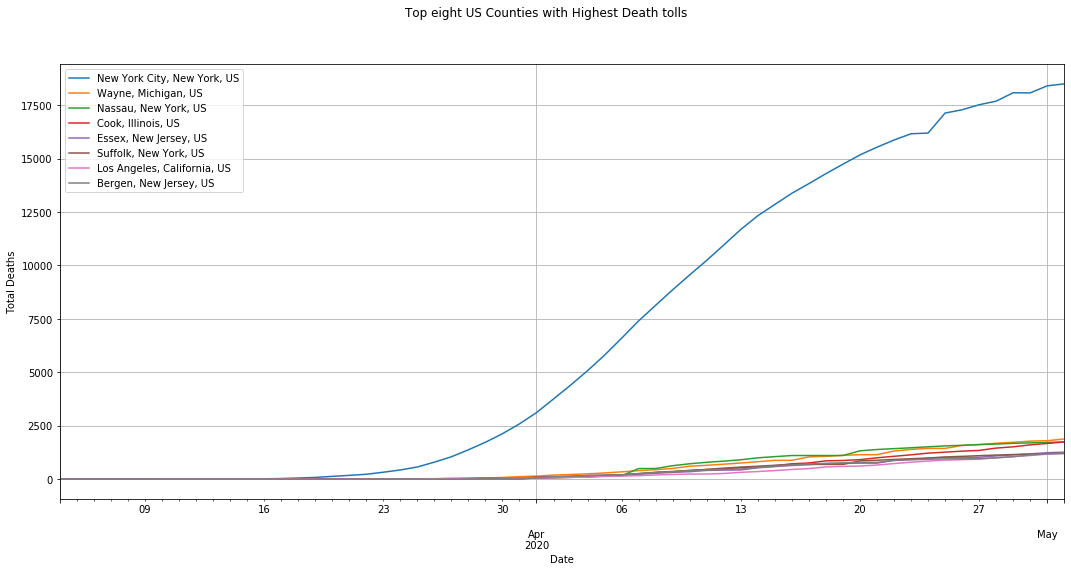

In [16]:
# 1.b : line graph of deaths by US county

plt2 = plot1df.plot(kind="line", figsize=(18,8))
plt2.figure.suptitle("Top eight US Counties with Highest Death tolls")
plt2.set_xlabel("Date")
plt2.set_ylabel("Total Deaths")
plt2.grid()
plt2

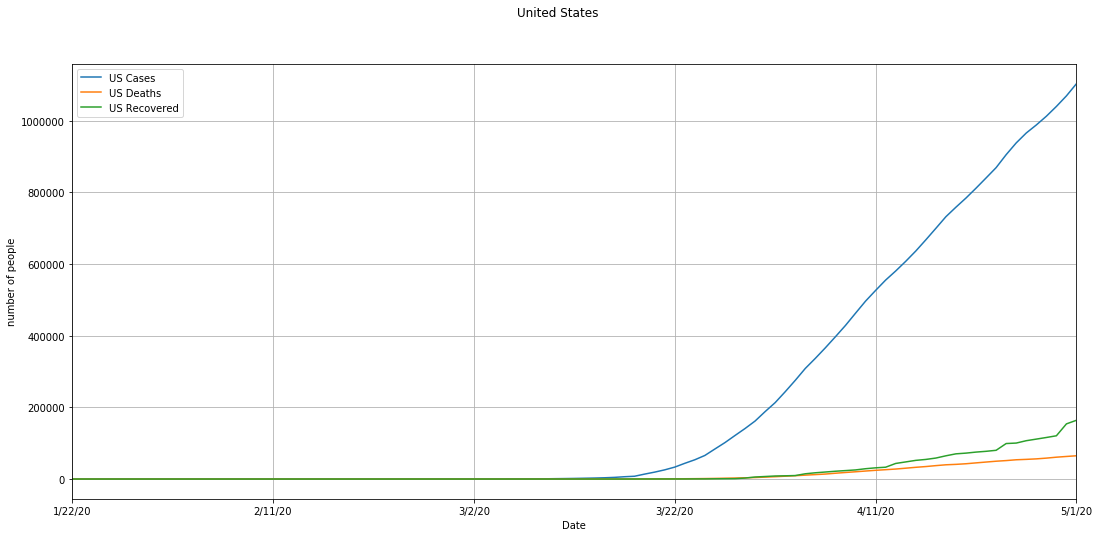

In [4]:
US = pd.DataFrame({
    'US Cases' : (confirmed[confirmed['Country/Region']=='US'].iloc[0][4:]),
    'US Deaths': (deaths[deaths['Country/Region']=='US'].iloc[0][4:]),
    'US Recovered': (recovered[recovered['Country/Region']=='US'].iloc[0][4:])
},index = confirmed.keys()[4:])

plt6 = US.plot(kind='line',figsize=(18,8))
plt6.figure.suptitle("United States")
plt6.set_xlabel('Date')
plt6.set_ylabel('number of people')
plt6.grid()
plt6

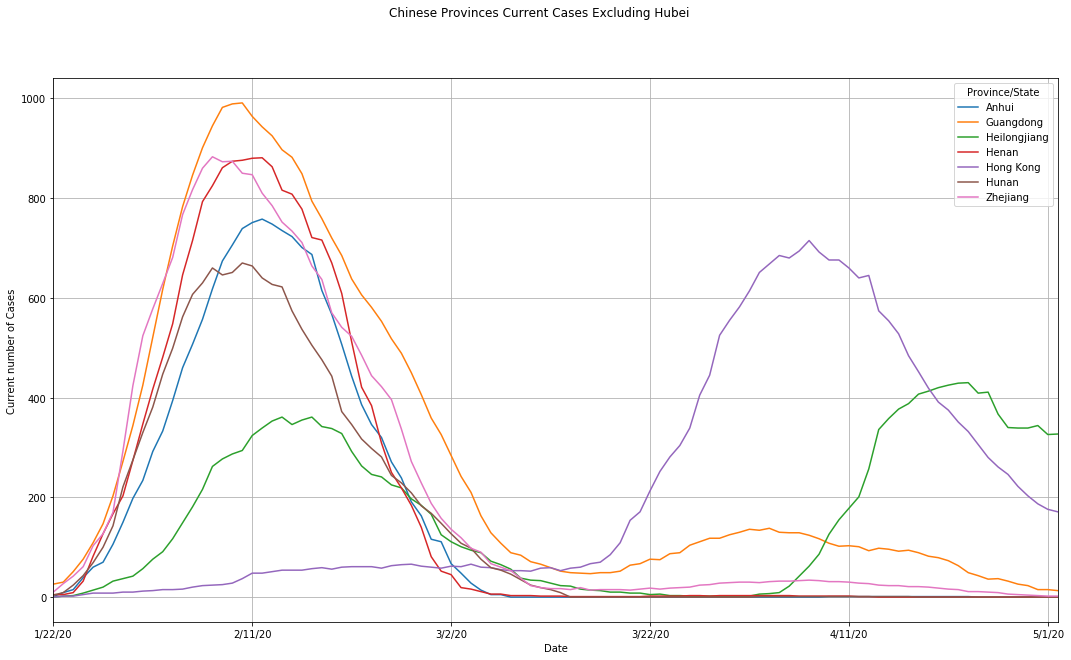

In [47]:
china_rec = recovered[recovered['Country/Region']=='China']
del china_rec['Lat']
del china_rec["Long"]
del china_rec['Country/Region']

china_con = confirmed[confirmed['Country/Region']=='China']
del china_con['Lat']
del china_con["Long"]
del china_con['Country/Region']

china_death = deaths[deaths['Country/Region']=='China']
del china_death['Lat']
del china_death['Long']
del china_death['Country/Region']

# Transpose the two dataframes 
china_con = china_con.set_index('Province/State').T
china_rec = china_rec.set_index('Province/State').T
china_death = china_death.set_index('Province/State').T

R = china_rec.add(china_death)
current_cases = china_con.sub(R)

china_top8 = pd.DataFrame( ((confirmed[confirmed['Country/Region']=='China']).sort_values(by=(confirmed.keys()[-1]),ascending=False))[:8] )
del current_cases['Hubei']

# delete provinces not in top 8 
for i in current_cases:
    tops = list((china_top8.T).iloc[0])
    if i not in tops:
        del current_cases[i]

plt7 = current_cases.plot(kind="line", figsize=(18,10))
plt7.figure.suptitle("Chinese Provinces Current Cases Excluding Hubei")
plt7.set_xlabel("Date")
plt7.set_ylabel("Current number of Cases")
plt7.grid()
plt7

Text(0.5, 0.98, 'Death Toll by country as of 5/2/20')

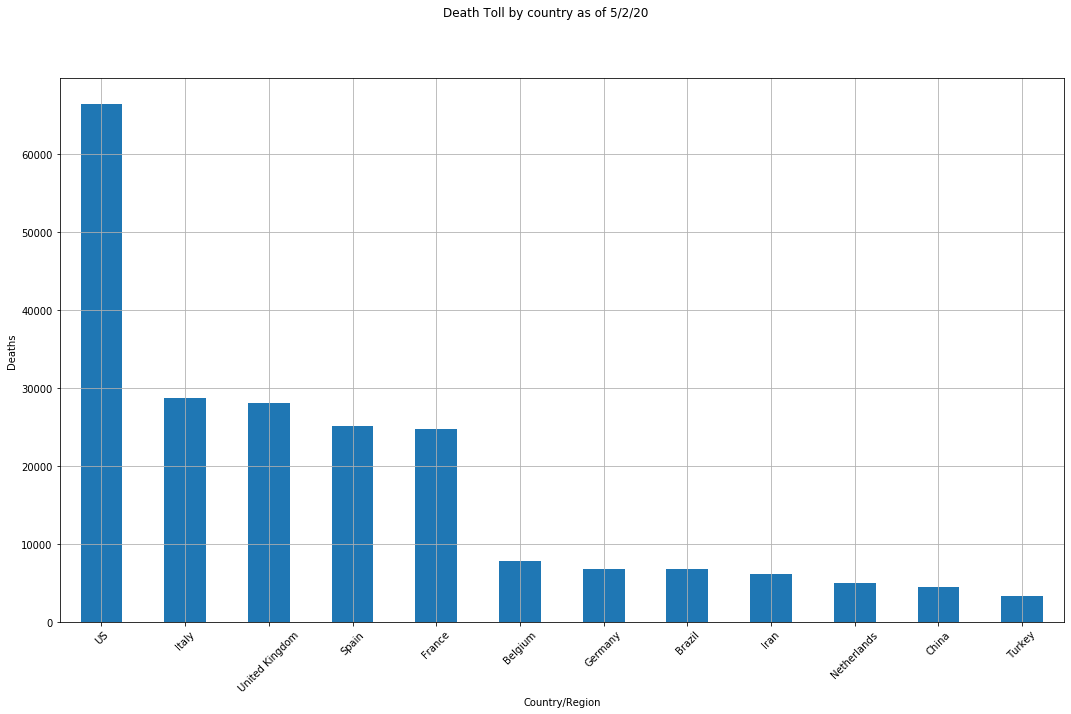

In [76]:
#bar plot for current top death toll countries
top_deaths = pd.DataFrame( (deaths.sort_values(by=(deaths.keys()[-1]),ascending = False))[:12] )
del top_deaths['Province/State']
del top_deaths['Lat']
del top_deaths['Long']

top_deaths = top_deaths.set_index('Country/Region').T # Transpose

plt8 = ( top_deaths.iloc[-1] ).plot(kind='bar',figsize=(18,10))
plt8.grid() #adds gridlines
plt8.set_ylabel('Deaths') # sets the y axis label
plt.xticks(rotation = 45) # rotates the x labels so they are easier to read
plt8.figure.suptitle("Death Toll by country as of "+str(deaths.keys()[-1])) #sets the title of the figure

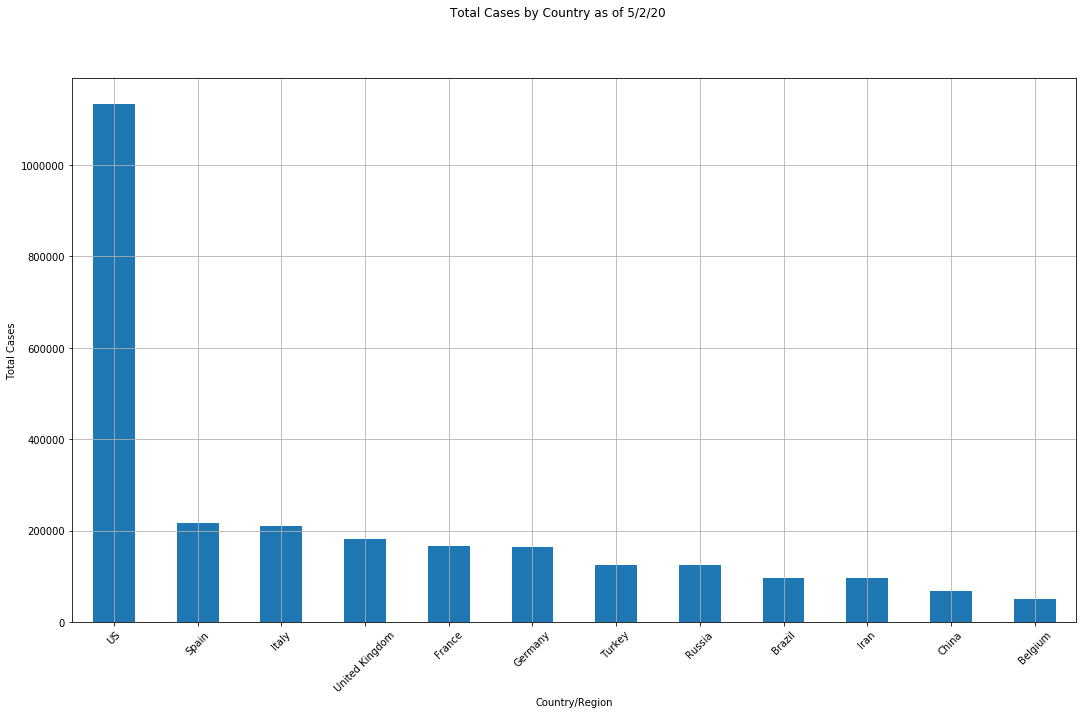

In [83]:
# bar plot for total cases by country
top_con = pd.DataFrame( (confirmed.sort_values(by=(confirmed.keys()[-1]),ascending = False))[:12] )
del top_con['Province/State']
del top_con['Lat']
del top_con['Long']

top_con = top_con.set_index('Country/Region').T #transpose

plt9 = ( top_con.iloc[-1] ).plot(kind='bar', figsize=(18,10))
plt9.set_ylabel('Total Cases')
plt.xticks(rotation = 45)
plt9.figure.suptitle('Total Cases by Country as of ' + str(confirmed.keys()[-1]))
plt9.grid()
plt9


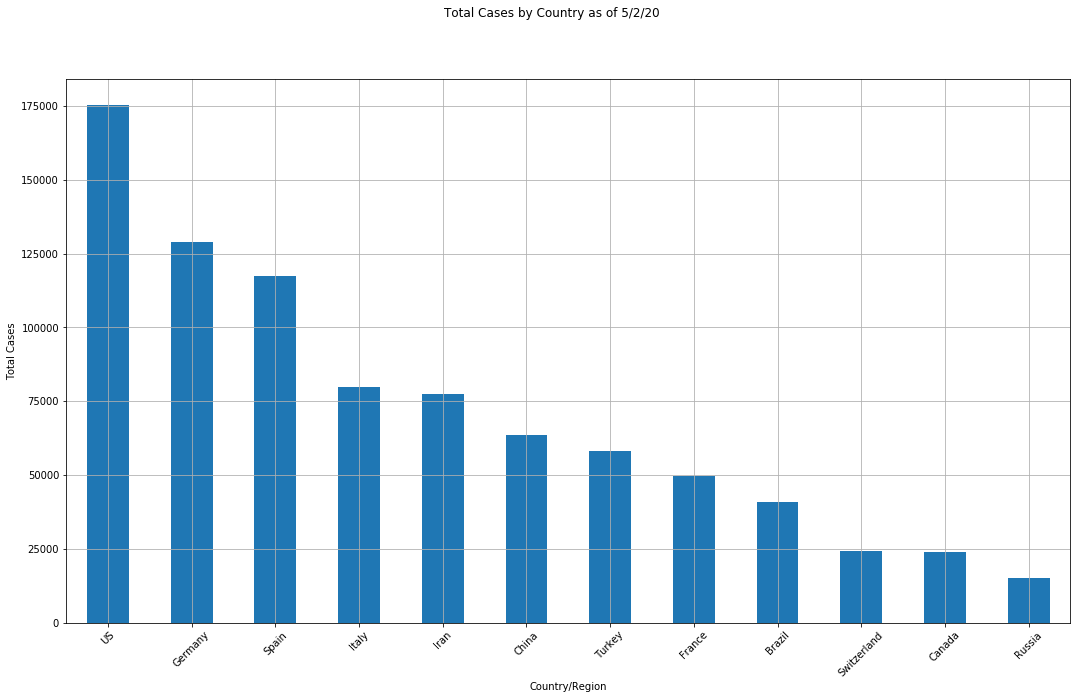

In [84]:
top_rec = pd.DataFrame( (recovered.sort_values(by=(recovered.keys()[-1]),ascending = False))[:12] )
del top_rec['Province/State']
del top_rec['Lat']
del top_rec['Long']

top_rec = top_rec.set_index('Country/Region').T #transpose

plt9 = ( top_rec.iloc[-1] ).plot(kind='bar', figsize=(18,10))
plt9.set_ylabel('Total Recovered Cases')
plt.xticks(rotation = 45)
plt9.figure.suptitle('Total Recovered Cases by Country as of ' + str(recovered.keys()[-1]))
plt9.grid()
plt9

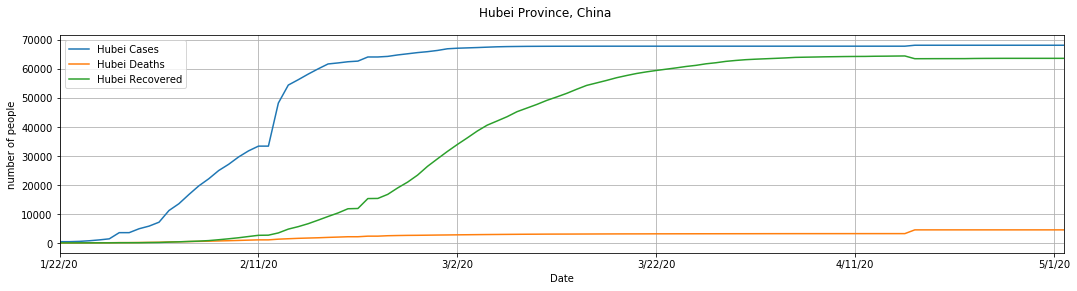

In [85]:
# Hubei, China plot of cases,recovered,and deaths

hubei = pd.DataFrame({
    'Hubei Cases' : ((confirmed[confirmed['Province/State']=='Hubei']).iloc[0][4:]),
    'Hubei Deaths': ((deaths[deaths['Province/State']=='Hubei']).iloc[0][4:]),
    'Hubei Recovered': ((recovered[recovered['Province/State']=='Hubei']).iloc[0][4:])
},index = confirmed.keys()[4:])

plt10 = hubei.plot(kind='line',figsize=(18,4))
plt10.figure.suptitle("Hubei Province, China")
plt10.set_xlabel('Date')
plt10.set_ylabel('number of people')
plt10.grid()
plt10